In [2]:
pip install beautifulsoup4


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import pandas as pd

In [6]:
res = requests.get('https://www.itreview.jp/products/macos/reviews')
soup = BeautifulSoup(res.text, 'html.parser')

div_tag = soup.find('div', id='paginate_top')
dd_tag = div_tag.find_all('dd', class_ = 'product-review-answer')

mac_lists = []
for i in dd_tag:
    p_tag = i.find('p')
    if p_tag:
        mac_lists.append(p_tag.get_text(separator=" "))

print(mac_lists)
print(len(mac_lists))

['・トラックパッドが優秀\n \u3000操作はシンプルでトラックパッドでの操作感が非常に快適です。\n \u3000Windows PCでは別途マウスが必要でしたが、macに関してはマウスなしでの操作がしやすいです。\n ・標準機能で日常のあらゆることができる\n \u3000ちょっとした画像のトリミングは「プレビュー」アプリで簡単にトリミングできます。\n \u3000映像もトリミングだけであれば「QuickTime」で簡単に処理できます。\n \u3000ルーティン作業は「Automator」（WindowsでいうPower Automate）で作業効率も上がります。\n \u3000このように標準機能だけで日常業務や作業でこれができたらいいのにを解消できて生産性が高いです。\n ・連携機能\n \u3000会社携帯がiPhoneであれば会社携帯で撮影した画像データをAirdropで素早くPCへ転送できます。\n \u3000もちろん画像だけでなく連絡先やPDFその他さまざまなデータをAirdropで素早く転送できる点はとても快適です。\n \u3000また、iPhoneで見ていたウェブサイトや書きかけのメモやメールをMacでそのまま続けることができる点も便利に使えています。', '・対応アプリケーション\n \u3000全体的にWindows向けのアプリケーションの方が自由度が高かったり、そもそもMac向けのアプリとしては提供されていないなどがあります。\n \u3000仮想的にWindows環境を再現する方法もありますが、可能であればMac1台（基本機能）で完結できるよう対応アプリが増えるようになると良いです。\n ・Windowsとの互換性\n \u3000文字化けは以前と比べ大幅に減少したと思いますが、完全ではありません。\n \u3000文字だけでなく、アプリ依存にはなりますが、Mac版とWindows版の機能差分等の関係で、互換性が少し足りない場面があります。\n \u3000（Excel for macでは改行コードを検索/置換できないなど）\n \u3000パワポ/ワードなど業務でよく使用するソフトもレイアウトが少し崩れる点は課題です。\n \u3000業務によってはWindows環境が欲しくなる時があるため、もう少し解消されると良いです。'

In [9]:
print(mac_lists)

['・トラックパッドが優秀\n \u3000操作はシンプルでトラックパッドでの操作感が非常に快適です。\n \u3000Windows PCでは別途マウスが必要でしたが、macに関してはマウスなしでの操作がしやすいです。\n ・標準機能で日常のあらゆることができる\n \u3000ちょっとした画像のトリミングは「プレビュー」アプリで簡単にトリミングできます。\n \u3000映像もトリミングだけであれば「QuickTime」で簡単に処理できます。\n \u3000ルーティン作業は「Automator」（WindowsでいうPower Automate）で作業効率も上がります。\n \u3000このように標準機能だけで日常業務や作業でこれができたらいいのにを解消できて生産性が高いです。\n ・連携機能\n \u3000会社携帯がiPhoneであれば会社携帯で撮影した画像データをAirdropで素早くPCへ転送できます。\n \u3000もちろん画像だけでなく連絡先やPDFその他さまざまなデータをAirdropで素早く転送できる点はとても快適です。\n \u3000また、iPhoneで見ていたウェブサイトや書きかけのメモやメールをMacでそのまま続けることができる点も便利に使えています。', '・対応アプリケーション\n \u3000全体的にWindows向けのアプリケーションの方が自由度が高かったり、そもそもMac向けのアプリとしては提供されていないなどがあります。\n \u3000仮想的にWindows環境を再現する方法もありますが、可能であればMac1台（基本機能）で完結できるよう対応アプリが増えるようになると良いです。\n ・Windowsとの互換性\n \u3000文字化けは以前と比べ大幅に減少したと思いますが、完全ではありません。\n \u3000文字だけでなく、アプリ依存にはなりますが、Mac版とWindows版の機能差分等の関係で、互換性が少し足りない場面があります。\n \u3000（Excel for macでは改行コードを検索/置換できないなど）\n \u3000パワポ/ワードなど業務でよく使用するソフトもレイアウトが少し崩れる点は課題です。\n \u3000業務によってはWindows環境が欲しくなる時があるため、もう少し解消されると良いです。'

In [12]:
db_name = "macre.db"
conn = sqlite3.connect(db_name)

In [13]:
conn

In [14]:
macre_data = pd.DataFrame(mac_lists)
print(macre_data)

                                                    0
0   ・トラックパッドが優秀\n 　操作はシンプルでトラックパッドでの操作感が非常に快適です。\n...
1   ・対応アプリケーション\n 　全体的にWindows向けのアプリケーションの方が自由度が高か...
2   ・データ転送\n 　打ち合わせ時に相手のiPhoneやMacへデータを渡す際に、ネット環境に...
3   ・Apple製品の連携（iPhoneやiPadなどを利用している場合は使用感が同一でかつ、連...
4   公私ともに15年以上使用していますが、やはりトラックパッドの直感的な操作が気持ちよく、ストレ...
5   10数年以上も感じている事ですが、ファイルやフォルダ関連はwindowsの方が見やすく使いや...
6   同じapple製品であればairdropも使えるので、ファイルの行き来もしやすく時短にもつな...
7   セキュリティが他のOSよりしっかりしていると言われているが確かに実感があり、windowsの...
8   現状で満足しているが、会計王などマックosで使えないソフトがあるのは非常に残念に思います。ま...
9   macosの場合、起動がスムーズにできるので出先の隙間時間など、ちょっとの時間で何か作業を進...
10  何よりも直感的に操作できる点が一番のポイントです。ラップトップですとマウスを接続する必要なく...
11  機能やデザイン面においては特にありませんが、あえて挙げるなら導入コストが高いのでもう少し同ス...
12  主に出先での作業用に使用しています。性能が高いため複数のアプリを開いてもサクサク作業できて非...
13  エンジニア向けのアプリケーションとの互換性がwindowsより良い。デフォルトでtermin...
14  m1 macになってから、arm64で互換性がないケースがあり、それがとても不便。特にpyt...
15  開発をする上で、macを利用することでツール導入の互換性の問題がなくスムーズに進めれています...
16  直感的なアクションで操作できるのが最も良いところだと思います。iPadなどにも言えることです...
17  windowsとの比較になりますが、フリーソフト

In [15]:
macre_data.to_sql("macre_class", conn, if_exists="replace")

32

In [16]:
c = conn.cursor()
query = 'SELECT * FROM macre_class'
c.execute (query)

In [17]:
for row in c.execute(query):
  print(row)
  

(0, '・トラックパッドが優秀\n \u3000操作はシンプルでトラックパッドでの操作感が非常に快適です。\n \u3000Windows PCでは別途マウスが必要でしたが、macに関してはマウスなしでの操作がしやすいです。\n ・標準機能で日常のあらゆることができる\n \u3000ちょっとした画像のトリミングは「プレビュー」アプリで簡単にトリミングできます。\n \u3000映像もトリミングだけであれば「QuickTime」で簡単に処理できます。\n \u3000ルーティン作業は「Automator」（WindowsでいうPower Automate）で作業効率も上がります。\n \u3000このように標準機能だけで日常業務や作業でこれができたらいいのにを解消できて生産性が高いです。\n ・連携機能\n \u3000会社携帯がiPhoneであれば会社携帯で撮影した画像データをAirdropで素早くPCへ転送できます。\n \u3000もちろん画像だけでなく連絡先やPDFその他さまざまなデータをAirdropで素早く転送できる点はとても快適です。\n \u3000また、iPhoneで見ていたウェブサイトや書きかけのメモやメールをMacでそのまま続けることができる点も便利に使えています。')
(1, '・対応アプリケーション\n \u3000全体的にWindows向けのアプリケーションの方が自由度が高かったり、そもそもMac向けのアプリとしては提供されていないなどがあります。\n \u3000仮想的にWindows環境を再現する方法もありますが、可能であればMac1台（基本機能）で完結できるよう対応アプリが増えるようになると良いです。\n ・Windowsとの互換性\n \u3000文字化けは以前と比べ大幅に減少したと思いますが、完全ではありません。\n \u3000文字だけでなく、アプリ依存にはなりますが、Mac版とWindows版の機能差分等の関係で、互換性が少し足りない場面があります。\n \u3000（Excel for macでは改行コードを検索/置換できないなど）\n \u3000パワポ/ワードなど業務でよく使用するソフトもレイアウトが少し崩れる点は課題です。\n \u3000業務によってはWindows環境が欲しくなる時があるため、もう少し解消される

In [7]:
import glob
import re
import unicodedata
import pandas as pd

def to_full_width(match):
    return unicodedata.normalize('NFKC', match.group())

text_paths = glob.glob('/Users/tanakatooryu/dsp2final/tanakatorudsp/macre.db')
texts = []

for text_path in text_paths:
    
    with open(text_path, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        

    
    text = open(text_path, 'r', encoding='utf-8', errors='ignore').read()
    text = re.sub(" ", "", text)
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r'[｡-ﾟ]', to_full_width, text)
    text = re.sub(r'\(.*?\)|「」|\.', '', text)  
    text = re.sub("　", "", text)
    text = re.sub("\x00","",text)
    text = re.sub("する","",text)

    texts.append(text)

news_ss = pd.Series(texts)
display(news_ss.head(100))

0    3@_
\n665#____"___""_"]#...
dtype: object

In [8]:
import MeCab
tagger = MeCab.Tagger("-Ochasen")
import mojimoji
import os
import urllib

def load_jp_stopwords(path="jp_stop_words.txt"):
    url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    if os.path.exists(path):
        print('File already exists.')
    else:
        print('Downloading...')
        urllib.request.urlretrieve(url, path)
    return pd.read_csv(path, header=None)[0].tolist()

def preprocess_jp(series):
    stop_words = load_jp_stopwords()
    def tokenizer_func(text):
        tokens = []
        node = tagger.parseToNode(str(text))
        while node:
            features = node.feature.split(',')
            surface = features[6]
            if (surface == '*') or (len(surface) < 2) or (surface in stop_words):
                node = node.next
                continue
            noun_flag = (features[0] == '名詞')
            proper_noun_flag = (features[0] == '名詞') & (features[1] == '固有名詞')
            verb_flag = (features[0] == '動詞') & (features[1] == '自立')
            adjective_flag = (features[0] == '形容詞') & (features[1] == '自立')
            if proper_noun_flag:
                tokens.append(surface)
            elif noun_flag:
                tokens.append(surface)
            elif verb_flag:
                tokens.append(surface)
            elif adjective_flag:
                tokens.append(surface)
            node = node.next
        return " ".join(tokens)

    series = series.map(tokenizer_func)
    
    #---------------Normalization-----------#
    series = series.map(lambda x: x.lower())
    series = series.map(mojimoji.zen_to_han)

    return series
    
processed_news_ss = preprocess_jp(news_ss)
display(processed_news_ss.head()) 

File already exists.


0    感じる ﾌｧｲﾙ folder 関連 見やすい 使う ｻﾑﾈｲﾙ 表示 整頓 機能 使う 感...
dtype: object

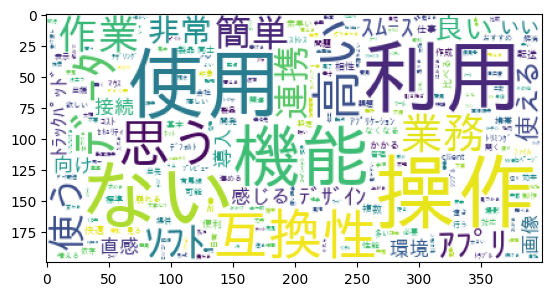

In [9]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font_path="/Library/Fonts/ipaexg.ttf"
font_property = matplotlib.font_manager.FontProperties(fname=font_path, size=24)

def show_wordcloud(series):
    long_string = ','.join(list(series.values))
    
    # Create a WordCloud object
    wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
    
    # Generate a word cloud
    wordcloud.generate(long_string)
    
    # Visualize the word cloud
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(processed_news_ss) 